# Exercise 2: Decision Trees

In this assignment you will implement a Decision Tree algorithm as learned in class.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. Submission includes this notebook only with the exercise number and your ID as the filename. For example: `hw2_123456789_987654321.ipynb` if you submitted in pairs and `hw2_123456789.ipynb` if you submitted the exercise alone.
1. Write **efficient vectorized** code whenever possible. Some calculations in this exercise take several minutes when implemented efficiently, and might take much longer otherwise. Unnecessary loops will result in point deduction.
1. You are responsible for the correctness of your code and should add as many tests as you see fit. Tests will not be graded nor checked.
1. Write your functions in this notebook only. **Do not create Python modules and import them**.
1. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. **Do not import anything else.**
1. Your code must run without errors. Make sure your `numpy` version is at least 1.15.4 and that you are using at least python 3.6. Changes of the configuration we provided are at your own risk. Any code that cannot run will not be graded.
1. Write your own code. Cheating will not be tolerated.
1. Answers to qualitative questions should be written in **markdown** cells (with $\LaTeX$ support). Answers that will be written in commented code blocks will not be checked.

## In this exercise you will perform the following:
1. Practice OOP in python.
2. Implement two impurity measures: Gini and Entropy.
3. Construct a decision tree algorithm.
4. Prune the tree to achieve better results.
5. Visualize your results.

# I have read and understood the instructions: *** 316496025, 307851311 ***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Warmup - OOP in python

Our desicion tree will be implemented using a dedicated python class. Python classes are very similar to classes in Java.


You can use the following [site](https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/) to learn about classes in python.

In [2]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, node):
        self.children.append(node)

In [3]:
n = Node(5)
p = Node(6)
q = Node(7)
n.add_child(p)
n.add_child(q)
n.children

[<__main__.Node at 0x1d7e11c7fd0>, <__main__.Node at 0x1d7e11c7f40>]

## Data preprocessing

For the following exercise, we will use a dataset containing mushroom data `agaricus-lepiota.csv`. 

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous
one (=there are only two classes **edible** and **poisonous**). 
    
The dataset contains 8124 observations with 22 features:
1. cap-shape: bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
4. bruises: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

First, we will read and explore the data using pandas and the `.read_csv` method. Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [4]:
# load dataset
data = pd.read_csv('agaricus-lepiota.csv')

One of the advantages of the Decision Tree algorithm is that almost no preprocessing is required. However, finding missing values is always required.

In [5]:
#############################################################################
# TODO: Find the columns with missing values and remove them from the data.#
#############################################################################

data.dropna(axis='columns')

#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


We will split the dataset to `Training` and `Testing` datasets.

In [6]:
from sklearn.model_selection import train_test_split
# Making sure the last column will hold the labels
X, y = data.drop('class', axis=1), data['class']
X = np.column_stack([X,y])
# split dataset using random_state to get the same split each time
X_train, X_test = train_test_split(X, random_state=99)

print("Training dataset shape: ", X_train.shape)
print("Testing dataset shape: ", X_test.shape)

Training dataset shape:  (6093, 22)
Testing dataset shape:  (2031, 22)


In [7]:
y.shape

(8124,)

## Impurity Measures

Impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Implement the functions `calc_gini` and `calc_entropy`. You are encouraged to test your implementation (10 points).

In [8]:
def calc_gini(data):
    """
    Calculate gini impurity measure of a dataset.
 
    Input:
    - data: any dataset where the last column holds the labels.
 
    Returns the gini impurity.    
    """
    gini = 0.0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    label = data[:,-1]
    count = np.unique(label, return_counts=True)[1] # counting appernces of each label
    for i in count:
        gini +=  (i/label.shape[0])**2
    gini = 1-gini
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return gini

In [9]:
def calc_entropy(data):
    """
    Calculate the entropy of a dataset.

    Input:
    - data: any dataset where the last column holds the labels.

    Returns the entropy of the dataset.    
    """
    entropy = 0.0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    label = data[:,-1]
    count = np.unique(label, return_counts=True)[1] # counting appernces of each label
    for i in count:
        entropy -=  (i/label.shape[0])*np.log2(i/label.shape[0])
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return entropy

In [10]:
##### Your Tests Here #####
calc_gini(X), calc_entropy(X)

(0.4995636322379775, 0.9993703627906085)

## Goodness of Split

Given a feature the Goodnees of Split measures the reduction in the impurity if we split the data according to the feature.
$$
\Delta\varphi(S, A) = \varphi(S) - \sum_{v\in Values(A)} \frac{|S_v|}{|S|}\varphi(S_v)
$$

In our implementation the goodness_of_split function will return either the Goodness of Split or the Gain Ratio as learned in class. You'll control the return value with the `gain_ratio` parameter. If this parameter will set to False (the default value) it will return the regular Goodness of Split. If it will set to True it will return the Gain Ratio.
$$
GainRatio(S,A)=\frac{InformationGain(S,A)}{SplitInformation(S,A)}
$$
Where:
$$
InformationGain(S,A)=Goodness\ of\ Split\ calculated\ with\ Entropy\ as\ the\ Impurity\ function \\
SplitInformation(S,A)=- \sum_{a\in A} \frac{|S_a|}{|S|}\log\frac{|S_a|}{|S|}
$$
NOTE: you can add more parameters to the function and you can also add more returning variables (The given parameters and the given returning variable should not be touch). (10 Points)

In [11]:
def goodness_of_split(data, feature, impurity_func, gain_ratio=False):
    """
    Calculate the goodness of split of a dataset given a feature and impurity function.

    Input:
    - data: any dataset where the last column holds the labels.
    - feature: the feature index.
    - impurity func: a function that calculates the impurity.
    - gain_ratio: goodness of split or gain ratio flag.

    Returns the goodness of split (or the Gain Ration).  
    """
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    goodness=0
    featureDic = dict(zip(*np.unique(data[:,feature], return_counts=True))) # creating a dictionary of class as key and number of instances as value
    if not gain_ratio:
        goodness = impurity_func(data)
        for val in featureDic:
            goodness-=featureDic[val]/data.shape[0]*impurity_func(data[data[:,feature]==val])
    else:
        split = 0
        for val in featureDic.values():
            split-=(val/data.shape[0])*np.log2(val/data.shape[0])
        goodness =  goodness_of_split(data, feature, calc_entropy)/split
        
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return goodness    

## Building a Decision Tree

Use a Python class to construct the decision tree. Your class should support the following functionality:

1. Initiating a node for a decision tree. You will need to use several class methods and class attributes and you are free to use them as you see fit. We recommend that every node will hold the feature and value used for the split and its children.
2. Your code should support both Gini and Entropy as impurity measures. 
3. The provided data includes categorical data. In this exercise, when splitting a node create the number of children needed according to the attribute unique values.

Complete the class `DecisionNode`. The structure of this class is entirely up to you. 

Complete the function `build_tree`. This function should get the training dataset and the impurity as inputs, initiate a root for the decision tree and construct the tree according to the procedure you learned in class. (30 points)

In [12]:
class DecisionNode:
    """
    This class will hold everything you require to construct a decision tree.
    The structure of this class is up to you. However, you need to support basic 
    functionality as described above. It is highly recommended that you 
    first read and understand the entire exercise before diving into this class.
    """
    def __init__(self, feature, depth=0,data=None):
        self.feature = feature # column index of criteria being tested
        self.children = []
        self.data=data
        self.prev = []
        self.value = None
        self.depth =depth
        self.pred = None
        self.featureBackup = feature # for pruning
    def __repr__(self):
        return f"feature {self.feature}"
        
    def add_child(self, node):
        self.children.append(node)
    def CreateChildren(self):
        values = np.unique(self.data[:,self.feature])
        for val in values:
            tempData = self.data[self.data[:,self.feature] == val].copy()
            #tempData = np.delete(tempData,self.feature,1)
            
            temp = DecisionNode(-1,self.depth+1,tempData)
            temp.prev = self.prev.copy()
            temp.prev += [self.feature]
            temp.value = val
            self.add_child(temp)
            
        #print(self.children)
    def copy(self):
        temp = DecisionNode(self.feature,self.depth,self.data.copy())
        temp.children=self.children.copy()
        temp.prev = self.prev
        temp.value=self.value
        temp.pred = self.pred
        return temp
    
    def setToLeaf(self, permanent=False): # setting a node to be a leaf, if permanent is True deleting children list
        self.pred = max(zip(*np.unique(self.data[:,-1], return_counts=True)),key=lambda item:item[1])[0]
        self.feature = -1
        if permanent:
            self.children = []
            
    def returnToNode(self): # returning temporary leaf back to a node
        self.pred = None
        self.feature = self.featureBackup
        
        
        

In [13]:
def build_tree(data, impurity, gain_ratio=False, chi=1, max_depth=1000):
    """
    Build a tree using the given impurity measure and training dataset. 
    You are required to fully grow the tree until all leaves are pure. 

    Input:
    - data: the training dataset.
    - impurity: the chosen impurity measure. Notice that you can send a function
                as an argument in python.
    - gain_ratio: goodness of split or gain ratio flag
    - chi: chi square p-value cut off (1 means no pruning)
    - max_depth: the allowable depth of the tree

    Output: the root node of the tree.
    """
    root = None
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    root = DecisionNode(feature=-1,data = data)
    nodeQueue = [root]
    
    while(nodeQueue): # while there are node in the in the queue
        maxI,maxSplit = -1,0
        node = nodeQueue.pop(0)
        if impurity(node.data) != 0 and node.depth<max_depth:            
            for i in [x for x in range(data.shape[1]-1) if x not in node.prev]: # for any featue that was not devided by in its ancesters
                goodness = goodness_of_split(node.data,i,impurity,gain_ratio)
                if goodness>= maxSplit: # finding the best feature to split across
                    maxI, maxSplit = i,goodness
            node.feature,node.featureBackup = maxI, maxI
            if maxI !=-1:
                node.CreateChildren()            
            if chi!=1: # if pre pruning is enabled
                count = dict(zip(*np.unique(node.data[:,-1], return_counts=True)))
                probDict = {} # dictionary of probabilitis of classes
                for key in count:
                    probDict[key] = count[key]/node.data.shape[0]
                chiVal=0
                for c in node.children:
                    nfpf = dict(zip(*np.unique(c.data[:,-1], return_counts=True))) # for each child creating a dictionary of classes distribution
                    for key in nfpf:
                        chiVal+=(nfpf[key]-(c.data.shape[0]*probDict[key]))**2/(c.data.shape[0]*probDict[key]) # chi square formula
                chiVal = chiVal**0.5
                if chiVal<=chi: # if below chi threshold pruning the node
                    node.setToLeaf(True)
            nodeQueue+=node.children  
        elif impurity(node.data) == 0 :
            node.pred = node.data[0][-1]
        

                
        
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return root

In [14]:
# python supports passing a function as an argument to another function.
tree_gini = build_tree(data=X_train, impurity=calc_gini) # gini and goodness of split
tree_entropy = build_tree(data=X_train, impurity=calc_entropy) # entropy and goodness of split
tree_entropy_gain_ratio = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True) # entropy and gain ratio

## Tree evaluation

Complete the functions `predict` and `calc_accuracy`. (10 points)

In [15]:
def predict(node, instance):
    """
    Predict a given instance using the decision tree
 
    Input:
    - root: the root of the decision tree.
    - instance: an row vector from the dataset. Note that the last element 
                of this vector is the label of the instance.
 
    Output: the prediction of the instance.
    """
    pred = None
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    cur = node
    while cur.feature!=-1: # while we didnt arrived at a leaf
        val = instance[cur.feature]
        try:
            cur = [x for x in cur.children if x.value == val][0]
        except: #the tree is over-fitted. continuing to the child with mode instances
            maxChild, maxData = None, 0
            for child in cur.children:
                if child.data.shape[0]>=maxData:
                    maxChild = child
                    maxData = child.data.shape[0]
            cur = maxChild
    
    node.pred = cur.pred # setting the prediction of the node to the predition of the leaf
    
        
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return node.pred

In [16]:
def calc_accuracy(node, dataset):
    """
    Predict a given dataset using the decision tree
 
    Input:
    - node: a node in the decision tree.
    - dataset: the dataset on which the accuracy is evaluated
 
    Output: the accuracy of the decision tree on the given dataset (%).
    """
    accuracy = 0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    correct =0
    for ins in dataset:
        if predict(node,ins) == ins[-1]:
            correct+=1 # counts the number of correct clasifications
    accuracy = correct/dataset.shape[0] * 100
        
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return accuracy 

After building the three trees using the training set, you should calculate the accuracy on the test set. For each tree print the training and test accuracy. Select the tree that gave you the best test accuracy. For the rest of the exercise, use that tree (when you asked to build another tree use the same impurity function and same gain_ratio flag). 

In [17]:
print(f"Gini Tree : Training set {calc_accuracy(tree_gini,X_train)}% | Test Set  {calc_accuracy(tree_gini,X_test)}%")
print(f"Tree Entropy : Training set {calc_accuracy(tree_entropy,X_train)}% | Test Set  {calc_accuracy(tree_entropy,X_test)}%")
print(f"Tree Entropy With Gain Ratio : Training set {calc_accuracy(tree_entropy_gain_ratio,X_train)}% | Test Set  {calc_accuracy(tree_entropy_gain_ratio,X_test)}%")

Gini Tree : Training set 100.0% | Test Set  78.53274249138356%
Tree Entropy : Training set 100.0% | Test Set  78.23732151649435%
Tree Entropy With Gain Ratio : Training set 100.0% | Test Set  78.68045297882816%


## Post pruning

Iterate over all nodes in the tree that have at least a single child which is a leaf. For each such node, replace it with its most popular class. Calculate the accuracy on the testing dataset, pick the node that results in the highest testing accuracy and permanently change it in the tree. Repeat this process until you are left with a single node in the tree (the root). Finally, create a plot of the training and testing accuracies as a function of the number of nodes in the tree. (15 points)

In [18]:
def findLeaves(node,res):
    if node.feature == -1:
        return res
    for c in node.children:
        if c.feature == -1:
            res.add(node)
            break # found a leaf in the children list
    for c in node.children:
        res.union(findLeaves(c,res)) # recurcive call
    return res


In [19]:
def numOfNodes(node): # recursuive function to count the number of nodes in the tree
    sum =0
    for c in node.children:
        sum+=numOfNodes(c)
    return 1+sum
        

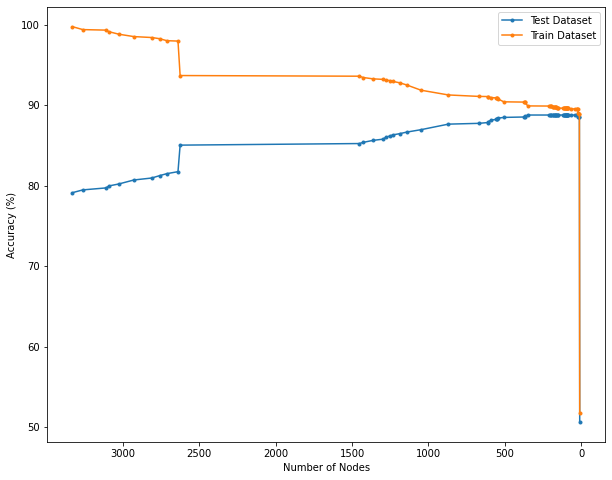

In [20]:
def postPruning(root,returnBestTree=False): # if returnBestTree = true will return best tree else will return testHistory, trainHistory,countHistory for plotting
    testHistory, trainHistory,countHistory = [],[],[]
    bestTree,bestTest = root.copy(),0
    while root.children: # while the root is not a leaf
        countHistory.append(numOfNodes(root)) # creating a list of number of node in the tree for each iteration
        resDict = {} # a dictionary with accuracy for key and node for value to fing the node that if we prun it we
        nodeSet = set()
        nodeSet = findLeaves(root,nodeSet)
        #print(f"there are {len(nodeSet)} in nodeSet")
        for node in nodeSet: # set the node to be a temporary leaf, calc the accuracy of the tree, save it and return it to a node
            node.setToLeaf()
            accuracy = calc_accuracy(root,X_test)
            resDict[accuracy] = node
            node.returnToNode()
        maxAccuracy = max(resDict.keys()) # finding the max accuracy
        resDict[maxAccuracy].setToLeaf(True) # permenently setting the node to a leaf
        trainHistory.append(calc_accuracy(root,X_train))
        testHistory.append(maxAccuracy)
        if maxAccuracy>=bestTest and returnBestTree: 
            bestTree = root.copy()
            bestTest = maxAccuracy
    if returnBestTree:
        return bestTree
    return testHistory, trainHistory,countHistory
tree_entropy_gain_ratio = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True)
testHistory, trainHistory,countHistory= postPruning(tree_entropy_gain_ratio)
#print(countHistory)
plt.plot(countHistory,testHistory,marker ='.')
plt.plot(countHistory,trainHistory,marker ='.')
plt.xlabel("Number of Nodes")
plt.ylabel("Accuracy (%)")
plt.legend(['Test Dataset','Train Dataset'])
plt.gca().invert_xaxis()
plt.show()
        

## Chi square pre-pruning

Consider the following p-value cut-off values: [1 (no pruning), 0.5, 0.25, 0.1, 0.05, 0.0001 (max pruning)]. For each value, construct a tree and prune it according to the cut-off value. Next, calculate the training and testing accuracy. On a single plot, draw the training and testing accuracy as a function of the tuple (p-value, tree depth). Mark the best result on the graph with red circle. (15 points)

In [21]:
### Chi square table values ###
# The first key is the degree of freedom 
# The second key is the p-value cut-off
# The values are the chi-statistic that you need to use in the pruning
chi_table = {1: {0.5 : 0.45,
                 0.25 : 1.32,
                 0.1 : 2.71,
                 0.05 : 3.84,
                 0.0001 : 100000},
             2: {0.5 : 1.39,
                 0.25 : 2.77,
                 0.1 : 4.60,
                 0.05 : 5.99,
                 0.0001 : 100000},
             3: {0.5 : 2.37,
                 0.25 : 4.11,
                 0.1 : 6.25,
                 0.05 : 7.82,
                 0.0001 : 100000},
             4: {0.5 : 3.36,
                 0.25 : 5.38,
                 0.1 : 7.78,
                 0.05 : 9.49,
                 0.0001 : 100000},
             5: {0.5 : 4.35,
                 0.25 : 6.63,
                 0.1 : 9.24,
                 0.05 : 11.07,
                 0.0001 : 100000},
             6: {0.5 : 5.35,
                 0.25 : 7.84,
                 0.1 : 10.64,
                 0.05 : 12.59,
                 0.0001 : 100000},
             7: {0.5 : 6.35,
                 0.25 : 9.04,
                 0.1 : 12.01,
                 0.05 : 14.07,
                 0.0001 : 100000},
             8: {0.5 : 7.34,
                 0.25 : 10.22,
                 0.1 : 13.36,
                 0.05 : 15.51,
                 0.0001 : 100000},
             9: {0.5 : 8.34,
                 0.25 : 11.39,
                 0.1 : 14.68,
                 0.05 : 16.92,
                 0.0001 : 100000},
             10: {0.5 : 9.34,
                  0.25 : 12.55,
                  0.1 : 15.99,
                  0.05 : 18.31,
                  0.0001 : 100000},
             11: {0.5 : 10.34,
                  0.25 : 13.7,
                  0.1 : 17.27,
                  0.05 : 19.68,
                  0.0001 : 100000}}

In [22]:
def findDepth(root): # returing the depth of the tree
    maxDepth = root.depth
    for c in root.children:
        maxDepth = max(maxDepth,findDepth(c))
    return maxDepth

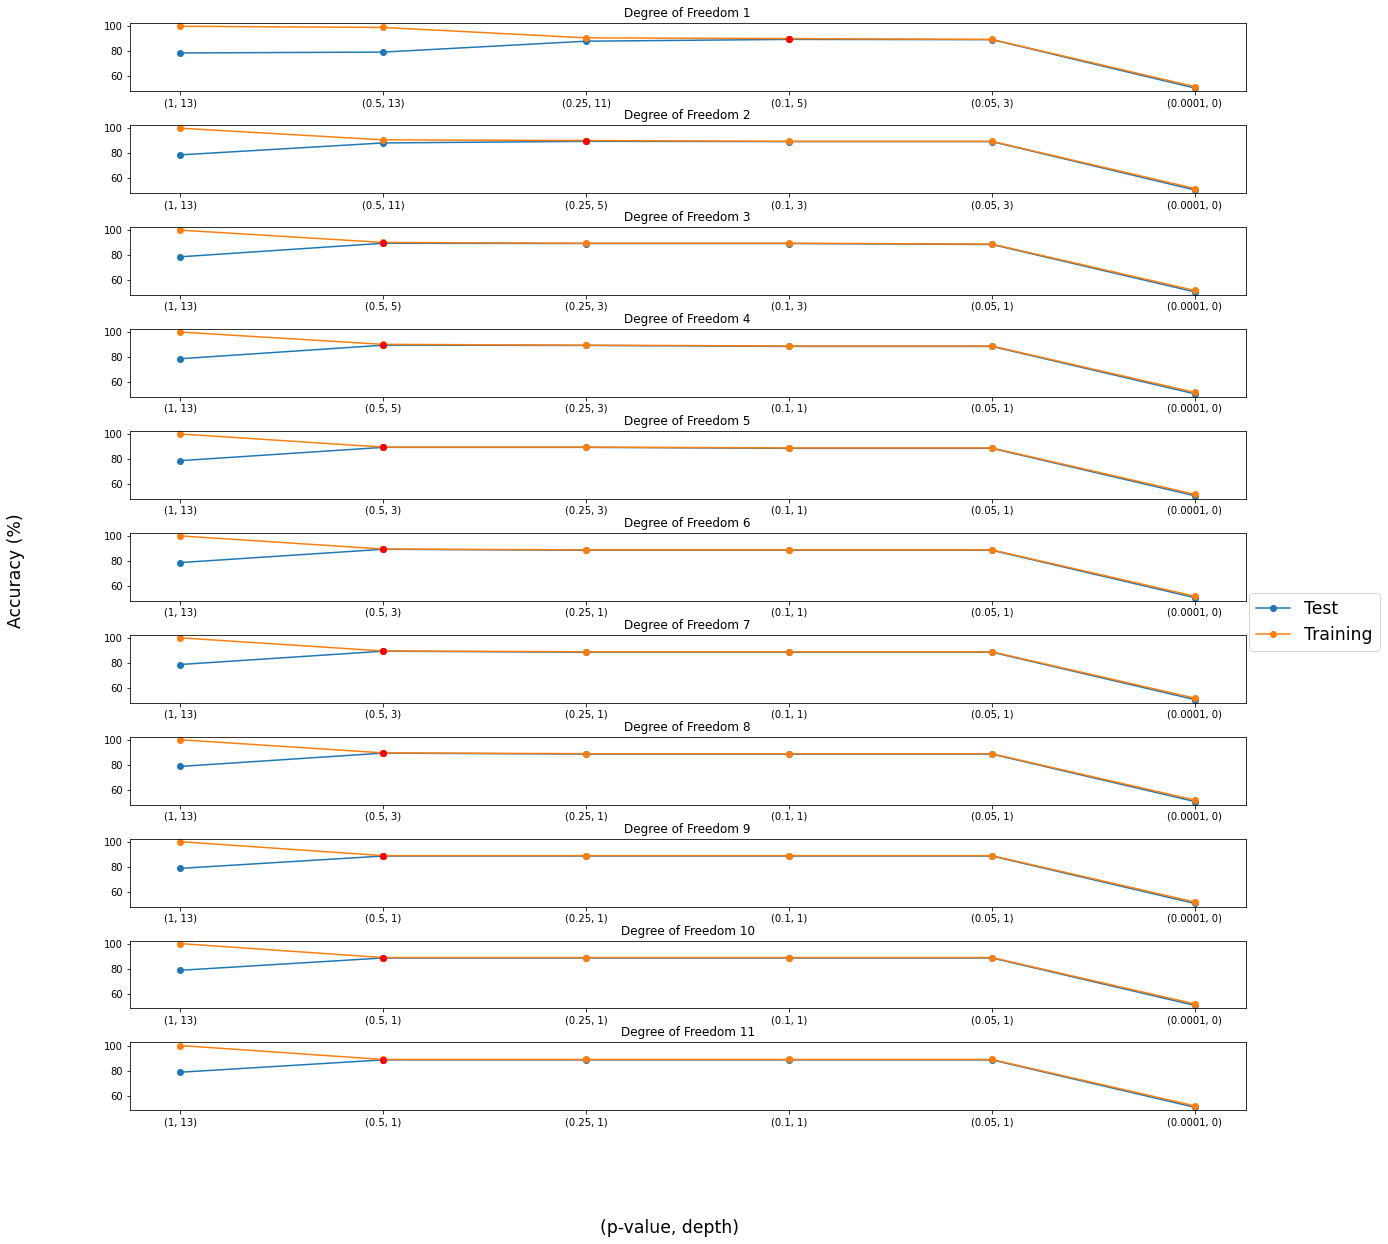

In [23]:
def chiSquare(returnBestTree = False): # if returnBestTree = true returing the best_chi tree else plots a graph of test and train accuracy for each degree of freedom
    fig, ax = plt.subplots(len(chi_table)) #creates subplots
    maxLs=[] # list for extracting the best chi_tree configuration
    for deg in chi_table:
        pvalDepthHistory, trainAcuHistory, testAcuHistory=[],[],[] # for plotting
        chiDict = chi_table[deg] # exractiong the p-value dictionary
        tree_entropy_gain_ratio = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True) # building a tree with no prunning
        pvalDepthHistory.append((1,findDepth(tree_entropy_gain_ratio)))
        testAcuHistory.append(calc_accuracy(tree_entropy_gain_ratio,X_test))
        trainAcuHistory.append(calc_accuracy(tree_entropy_gain_ratio,X_train))
        for pval in chiDict: # for each p-val in the degree of freedom create a tree with chi square test test its accuracy fr test and train dataset and saving its configuration
            chi = chiDict[pval]
            tree_entropy_gain_ratio = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True,chi = chi)
            pvalDepthHistory.append((pval,findDepth(tree_entropy_gain_ratio)))
            testAcuHistory.append(calc_accuracy(tree_entropy_gain_ratio,X_test))
            trainAcuHistory.append(calc_accuracy(tree_entropy_gain_ratio,X_train))
        ax[deg-1].plot([str(i) for i in pvalDepthHistory],testAcuHistory,marker = 'o')
        ax[deg-1].plot([str(i) for i in pvalDepthHistory],trainAcuHistory,marker = 'o')
        maxTest = max(zip(pvalDepthHistory,testAcuHistory),key = lambda x:x[1]) # finding the best tree in the degree of freedom
        maxLs.append((deg,maxTest)) # adding it to a list to later extract the best tree of them all
        ax[deg-1].plot(str(maxTest[0]),maxTest[1],'or')
        ax[deg-1].set_title(f"Degree of Freedom {deg}")
    fig.text(0.5, 0.04, '(p-value, depth)', ha='center',fontsize='xx-large')
    fig.text(0.04, 0.5, 'Accuracy (%)', va='center', rotation='vertical',fontsize='xx-large')
    plt.subplots_adjust(hspace=0.5)
    fig.legend(['Test','Training'],loc = 7,fontsize='xx-large')
    fig.set_size_inches(20, 20)
    if returnBestTree:
        bestConfig = max(maxLs,key = lambda x:x[1][1]) # finding the best tree of all degrees of freedoms and all p-vals
        plt.close()
        return build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True,chi = chi_table[bestConfig[0]][bestConfig[1][0][0]]) #returning the tree
    
    plt.show()
    
chiSquare()
        

Build the best 2 trees:
1. tree_max_depth - the best tree according to max_depth pruning
1. tree_chi - the best tree according to chi square pruning

In [24]:
tree_entropy_gain_ratio = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True) # builds a tree for post prunning
tree_max_depth = postPruning(tree_entropy_gain_ratio,True) # creates the best post prunning tree
tree_chi = chiSquare(True) # creates the best chi square tree

## Number of Nodes

Of the two trees above we will choose the one with fewer nodes. Complete the function counts_nodes and print the number of nodes in each tree. (5 points) 

In [25]:
def count_nodes(node):
    """
    Count the number of node in a given tree
 
    Input:
    - node: a node in the decision tree.
 
    Output: the number of node in the tree.
    """
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    return numOfNodes(node)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
print(f"Number of nodes in tree_max_depth : {count_nodes(tree_max_depth)}")
print(f"Number of nodes in tree_chi : {count_nodes(tree_chi)}")

Number of nodes in tree_max_depth : 10
Number of nodes in tree_chi : 31


## Print the tree

Complete the function `print_tree` and execute it on your chosen tree. Your tree should be visualized clearly. You can use the following example as a reference:
```
[ROOT, feature=X0],
  [X0=a, feature=X2]
    [X2=c, leaf]: [{1.0: 10}]
    [X2=d, leaf]: [{0.0: 10}]
  [X0=y, feature=X5], 
    [X5=a, leaf]: [{1.0: 5}]
    [X5=s, leaf]: [{0.0: 10}]
  [X0=e, leaf]: [{0.0: 25, 1.0: 50}]
```
In each brackets:
* The first argument is the parent feature with the value that led to current node
* The second argument is the selected feature of the current node
* If the current node is a leaf, you need to print also the labels and their counts

(5 points)

In [26]:
# you can change the function signeture
def print_tree(node, parent_feature='ROOT'):
    '''
    prints the tree according to the example above

    Input:
    - node: a node in the decision tree

    This function has no return value
    '''
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    if node.depth==0:
        print(f"0:[ROOT, feature=X{node.feature}]")
    else:
        if node.feature>=0:
            print(f"{' '*node.depth}{node.depth}:[X{parent_feature}={node.value}, feature=X{node.feature}]")
        else:
            count = list(zip(*np.unique(node.data[:,-1], return_counts=True)))
            leafVal = ""
            for c in count:
                leafVal+=f"{c[0]}: {c[1]}," # creating a string with classes and number of instances corresponding to the class in the leaf data
                leafVal = leafVal[:len(leafVal)-1]
            print(f"{' '*node.depth}{node.depth}:[X{parent_feature}={node.value}, leaf]: [{{{leafVal}}}]")
    for c in node.children:
        print_tree(c,node.feature)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
print_tree(tree_chi)

0:[ROOT, feature=X4]
 1:[X4=a, leaf]: [{e: 273p: 31}]
 1:[X4=c, leaf]: [{e: 10p: 137}]
 1:[X4=f, leaf]: [{e: 170p: 1438}]
 1:[X4=l, leaf]: [{e: 272p: 27}]
 1:[X4=m, leaf]: [{e: 2p: 25}]
 1:[X4=n, feature=X7]
  2:[X7=b, feature=X18]
   3:[X18=b, leaf]: [{e: 34p: 2}]
   3:[X18=k, leaf]: [{e: 843p: 93}]
   3:[X18=n, leaf]: [{e: 882p: 105}]
   3:[X18=o, leaf]: [{e: 28p: 4}]
   3:[X18=r, leaf]: [{e: 6p: 46}]
   3:[X18=w, leaf]: [{e: 369p: 33}]
   3:[X18=y, leaf]: [{e: 35p: 3}]
  2:[X7=n, feature=X3]
   3:[X3=f, feature=X10]
    4:[X10=f, leaf]: [{e: 17p: 3}]
    4:[X10=k, leaf]: [{p: 25}]
    4:[X10=s, feature=X2]
     5:[X2=c, leaf]: [{e: 10}]
     5:[X2=g, leaf]: [{e: 36p: 1}]
     5:[X2=n, leaf]: [{e: 37p: 9}]
     5:[X2=r, leaf]: [{e: 9p: 4}]
     5:[X2=u, leaf]: [{e: 14}]
     5:[X2=w, leaf]: [{e: 12p: 1}]
    4:[X10=y, leaf]: [{p: 7}]
   3:[X3=t, leaf]: [{p: 8}]
 1:[X4=p, leaf]: [{e: 8p: 175}]
 1:[X4=s, leaf]: [{e: 38p: 380}]
 1:[X4=y, leaf]: [{e: 49p: 382}]
